# Passive degrees of freedom



Passive dofs!



Transient Scan ID: 1     Time: 2023-08-11 05:59:56
Persistent Unique Scan ID: '6f4bfb12-20e7-44cc-958d-66a20ad13bcd'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |          x |   brownian |
+-----------+------------+------------+------------+
|         1 | 05:59:56.2 |     -0.843 |     -0.034 |
|         2 | 05:59:56.2 |      0.641 |     -0.027 |
|         3 | 05:59:56.2 |      3.454 |     -0.042 |
|         4 | 05:59:56.2 |     -3.656 |     -0.045 |
|         5 | 05:59:56.2 |     -3.790 |     -0.044 |
|         6 | 05:59:56.2 |      3.944 |     -0.057 |
|         7 | 05:59:56.2 |      1.757 |     -0.076 |
|         8 | 05:59:56.2 |     -1.602 |     -0.032 |
|         9 | 05:59:56.2 |     -2.223 |     -0.036 |
|        10 | 05:59:56.2 |      2.386 |     -0.031 |
|        11 | 05:59:56.2 |      4.574 |     -0.019 |
|        12 | 05:59:56.2 |     -4.411 |     -0.007 |
|        13 | 05:59:56.2 |     -2.987 |      0.013 |
|        14

+-----------+------------+------------+------------+
generator list_scan ['6f4bfb12'] (scan num: 1)





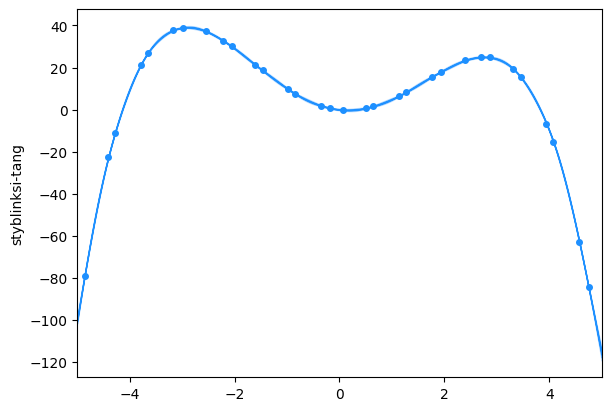

In [1]:
%run -i ../../../examples/prepare_bluesky.py # prepare the bluesky environment

from bloptools import devices, test_functions
from bloptools.bayesian import Agent


def digestion(db, uid):
    products = db[uid].table()

    for index, entry in products.iterrows():
        products.loc[index, "styblinksi-tang"] = test_functions.styblinski_tang(entry.x - 1e-1 * entry.brownian)

    return products


dofs = [
    {"device": devices.DOF(name="x"), "limits": (-5, 5), "kind": "active"},
    {"device": devices.BrownianMotion(name="brownian"), "limits": (-2, 2), "kind": "passive"},
]

tasks = [
    {"key": "styblinksi-tang", "kind": "minimize"},
]

agent = Agent(
    dofs=dofs,
    tasks=tasks,
    digestion=digestion,
    db=db,
)

RE(agent.initialize("qr", n_init=32))

agent.plot_tasks()